
# Reconocimento de voz femenina o masculina basandose en las propiedades acusticas de la voz.

Fuente:
https://www.kaggle.com/primaryobjects/voicegender

In [40]:
#importando librerias necesarias
import utils, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [5]:
# Usamos pandas para cargar el archivo csv:
df = pd.read_csv('data/voice.csv')
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [6]:
#vemos num de filas y columnas
df.shape

(3168, 21)

In [7]:
#tipos de datos
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [8]:
# % de datos faltantes
df.isna().sum() / len(df)

meanfreq    0.0
sd          0.0
median      0.0
Q25         0.0
Q75         0.0
IQR         0.0
skew        0.0
kurt        0.0
sp.ent      0.0
sfm         0.0
mode        0.0
centroid    0.0
meanfun     0.0
minfun      0.0
maxfun      0.0
meandom     0.0
mindom      0.0
maxdom      0.0
dfrange     0.0
modindx     0.0
label       0.0
dtype: float64

In [9]:
# Variables numéricas
num_vars = [c for c in df if pd.api.types.is_numeric_dtype(df[c])]
num_vars

['meanfreq',
 'sd',
 'median',
 'Q25',
 'Q75',
 'IQR',
 'skew',
 'kurt',
 'sp.ent',
 'sfm',
 'mode',
 'centroid',
 'meanfun',
 'minfun',
 'maxfun',
 'meandom',
 'mindom',
 'maxdom',
 'dfrange',
 'modindx']

In [10]:
#ignorar warnings
import warnings
warnings.simplefilter("ignore", UserWarning)

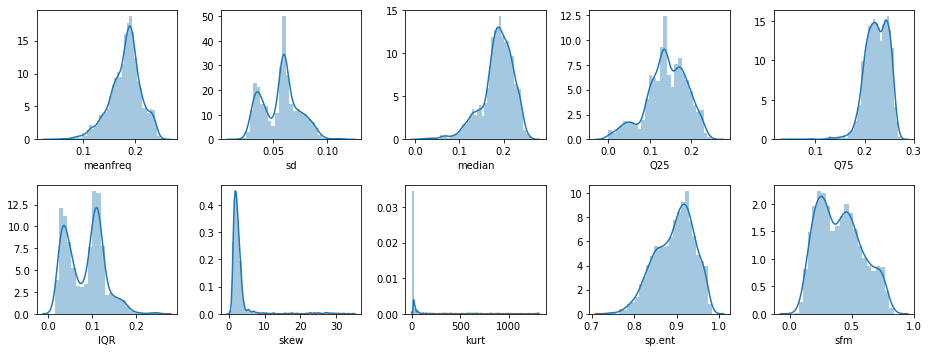

In [11]:
# rapida visualizacion de las variables
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(13,5))

for c,ax in zip(df, axes.flatten()):
    sns.distplot(df[c], ax=ax)
    
plt.tight_layout()

In [12]:
#separando y (label) de las variables 
x= df.drop('label', axis=1)
y = df['label']

In [13]:
# Árbol de decisión

In [19]:
# Entrenamos un arbol con poca profundidad, para visualizarlo comodamente:
from sklearn.tree import DecisionTreeClassifier
m = DecisionTreeClassifier(max_depth=3)

In [20]:
# accuracy}
m.score(x, y)

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [21]:
from sklearn.model_selection import train_test_split

# Usamos método "train_test_split" para usar el 20% de la data para validar el modelo.
# El parámetro "random state" nos sirve para poder replicar la misma separación.
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape: {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape: (2534, 20)
Validation shape: (634, 20)


In [22]:
m.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [23]:
# score data de entrenamiento
m.score(x_train,y_train)

0.9711917916337806

In [24]:
m.fit(x_val,y_val)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
# score data de validacion
m.score(x_val,y_val)

0.9842271293375394

In [26]:
utils.draw_tree(m, x_train)

AttributeError: module 'utils' has no attribute 'draw_tree'

In [27]:
# Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=10, n_jobs=-1)
m.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [29]:
# Vamos a definir una función para ver los resultados del entrenamiento.
def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x_train, y_train):.4}')
    print(f'Validation = {m.score(x_val, y_val):.4}')
    
score() 

Scores:
Train      = 0.9988
Validation = 0.9732


In [30]:
preds = np.stack([t.predict(x_val) for t in m.estimators_])
print(preds.shape)
preds

(10, 634)


array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 1., 0.]])

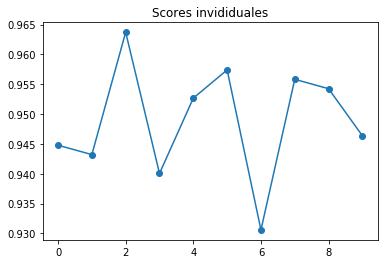

In [31]:
# score de cada árbol
from sklearn.metrics import accuracy_score

accs = [accuracy_score(y_val=='male', p) for p in preds]
plt.plot(accs, '-o')
plt.title('Scores invididuales');

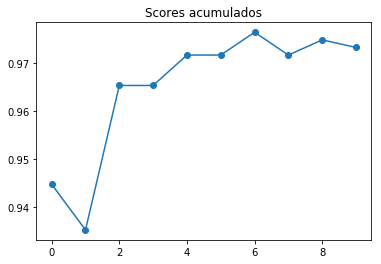

In [32]:
# score acumulado
acum_accs = [accuracy_score(y_val=='male', np.mean(preds[:i+1,:], axis=0) > 0.5) for i in range(len(preds))]
plt.plot(acum_accs, '-o')
plt.title('Scores acumulados');

In [33]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=10,min_samples_split=3,max_features=3, n_jobs=-1)
m.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [34]:
score() 

Scores:
Train      = 0.9976
Validation = 0.9685


In [35]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=10,min_samples_split=5,max_features=3, n_jobs=-1)
m.fit(x_train, y_train)
   
score() 

Scores:
Train      = 0.9957
Validation = 0.9779


In [36]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=500,min_samples_split=10,max_features=3, n_jobs=-1)
m.fit(x_train, y_train)
    
score() 

Scores:
Train      = 0.9972
Validation = 0.9826


In [37]:
# Eliminando variables

x1 = df.drop(['label','sp.ent','maxfun','meandom','mindom','centroid','Q75'], axis=1)
y1 = df['label']

In [38]:
from sklearn.model_selection import train_test_split

# Usamos método "train_test_split" para usar el 20% de la data para validar el modelo.
# El parámetro "random state" nos sirve para poder replicar la misma separación.
x1_train, x1_val, y1_train, y1_val = train_test_split(x1, y1, test_size=0.2, random_state=42)
print(f'Train shape: {x1_train.shape}')
print(f'Validation shape: {x1_val.shape}')

Train shape: (2534, 14)
Validation shape: (634, 14)


In [39]:
from sklearn.ensemble import RandomForestClassifier

m = RandomForestClassifier(n_estimators=1000,min_samples_split=10,max_features=2, n_jobs=-1)
m.fit(x1_train, y1_train)

score() 

Scores:


ValueError: Number of features of the model must match the input. Model n_features is 14 and input n_features is 20 

In [ ]:
# analizando variables de importancia
m.feature_importances_

In [ ]:
# visualizar importancia en barras
imp = pd.DataFrame({'cols':x1_train.columns, 'imp':m.feature_importances_}).sort_values('imp', ascending=False)
imp.style.bar()
# la media es la variable mas importante segun este indice

In [ ]:
m = RandomForestClassifier(n_estimators=500,min_samples_split=10,max_features=3, oob_score=True)
m.fit(x1_train, y1_train)

In [ ]:
# analizando en base al oob_score
m.oob_score_

In [ ]:
# Vamos a modificar la función score, para incluir el oob score.
def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x1_train, y1_train):.4}')
    print(f'Validation = {m.score(x1_val, y1_val):.4}')
    if hasattr(m, 'oob_score_'): print(f'OOB        = {m.oob_score_:.4}')
    
score() 

In [ ]:
# PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

In [ ]:
train_pca = pca.transform(x_train)
val_pca   = pca.transform(x_val)

In [ ]:
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [ ]:
#separando
pos_train_idx = np.where(y_train == 'male')
neg_train_idx = np.where(y_train == 'female')

In [ ]:
plt.scatter(train_pca[pos_train_idx,0], train_pca[pos_train_idx,1], alpha=0.5)
plt.scatter(train_pca[neg_train_idx,0], train_pca[neg_train_idx,1], alpha=0.5)

In [ ]:
from pdpbox import pdp, info_plots
# Ahora veamos como reacciona el modelo a esta variable
pdp_meanfun = pdp.pdp_isolate(m, x_train, x_train.columns, 'meanfun',
                                grid_type='equal')
fig, axes = pdp.pdp_plot(pdp_meanfun, 'meanfun', cluster=True, n_cluster_centers=5)
#axes['pdp_ax'].set_xticks(np.arange(len(education_lbls))+1)
#axes['pdp_ax'].set_xticklabels(education_lbls, rotation=45);

In [ ]:
# # REG LOGISTICA
# 

# # Probando el modelo (holdout validation)

In [ ]:
from sklearn.model_selection import train_test_split

x = df.drop('label', axis=1)
y = df['label']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

In [ ]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()
m.fit(x_train, y_train)

In [ ]:
def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x_train, y_train):.4}')
    print(f'Validation = {m.score(x_val, y_val):.4}')
score()

In [ ]:

from sklearn.model_selection import train_test_split

x1 = df.drop(['sp.ent', 'maxfun', 'meandom', 'mindom', 'centroid', 'Q75', 'label'], axis=1)
y1 = df['label']

x_train, x_val, y_train, y_val = train_test_split(x1, y1, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')


In [ ]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()
m.fit(x_train, y_train)

In [ ]:
score()

In [ ]:
# Probando el modelo (Cross Validation)

In [ ]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
x = df.drop('label', axis=1)
y = df['label']

train_scores, val_scores = [], []

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    m = LogisticRegression()
    m.fit(x_train, y_train)
    score()
    print()
    train_scores.append(m.score(x_train, y_train))
    val_scores.append(m.score(x_val, y_val))

print('=========================')
print(f'Average Scores:')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')

In [ ]:
x1 = df.drop(['sp.ent', 'maxfun', 'meandom', 'mindom', 'centroid', 'Q75', 'label'], axis=1)
y1 = df['label']

train_scores, val_scores = [], []

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    m = LogisticRegression()
    m.fit(x_train, y_train)
    score()
    print()
    train_scores.append(m.score(x_train, y_train))
    val_scores.append(m.score(x_val, y_val))

print('=========================')
print(f'Average Scores:')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')